In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("Movies.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes'], inplace=True)
df.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [7]:
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [8]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [9]:
df['Duration'] = df['Duration'].str.replace(r' min', '').astype(int)

In [10]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df.shape

(5850, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int32  
 2   Duration  5850 non-null   int32  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int32  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.2+ KB


In [12]:
dummy = df['Genre'].str.get_dummies(', ')
df_gen = pd.concat([df, dummy], axis=1)


In [13]:
gen = df_gen.columns[10:] 
gen

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

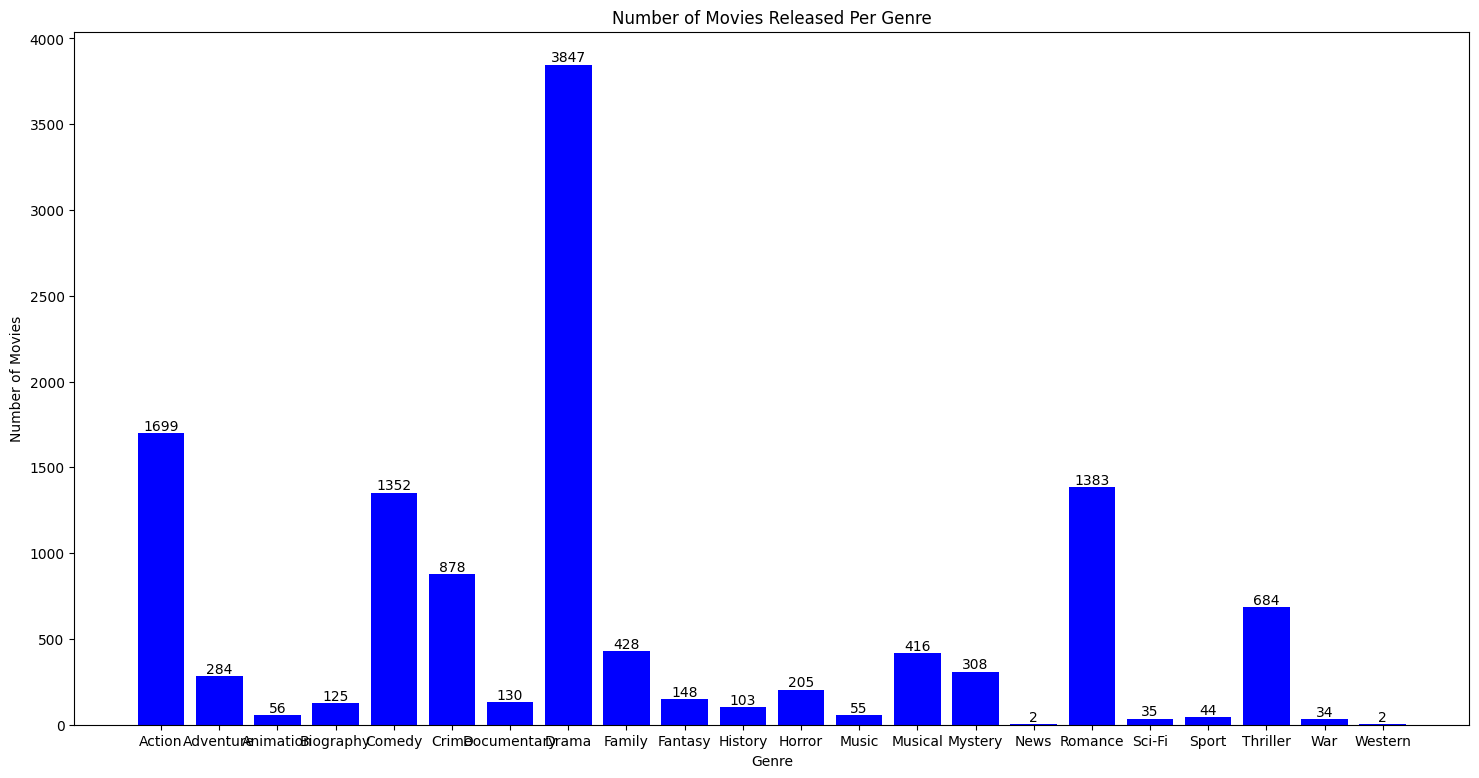

In [25]:
gen_movie_count = df_gen[gen].sum().sort_index()

plt.figure(figsize=(18, 9))
bars=plt.bar(gen_movie_count.index, gen_movie_count.values, color='blue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

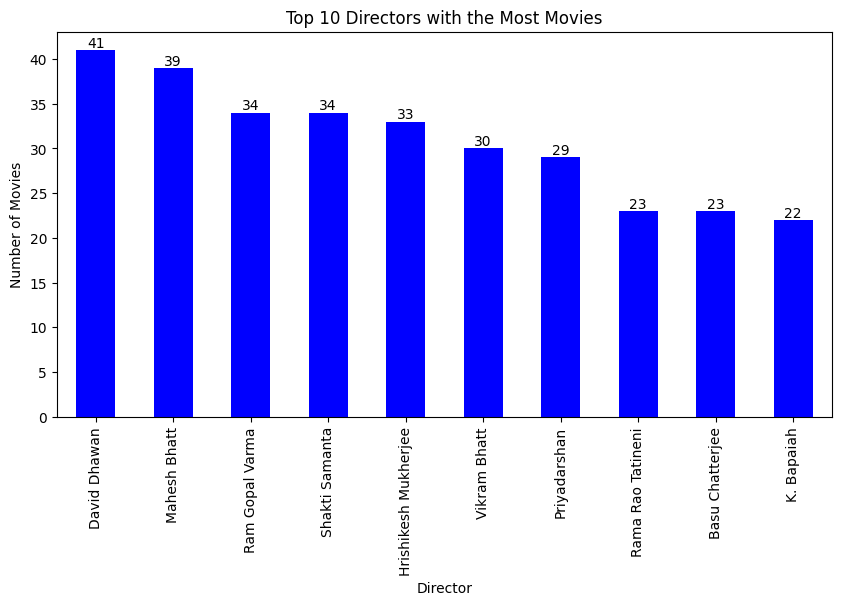

In [26]:
d_movie_counts = df['Director'].value_counts()

plt.figure(figsize=(10, 5))
bars = d_movie_counts.head(10).plot(kind='bar', color='blue')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with the Most Movies')

for bar in bars.patches:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

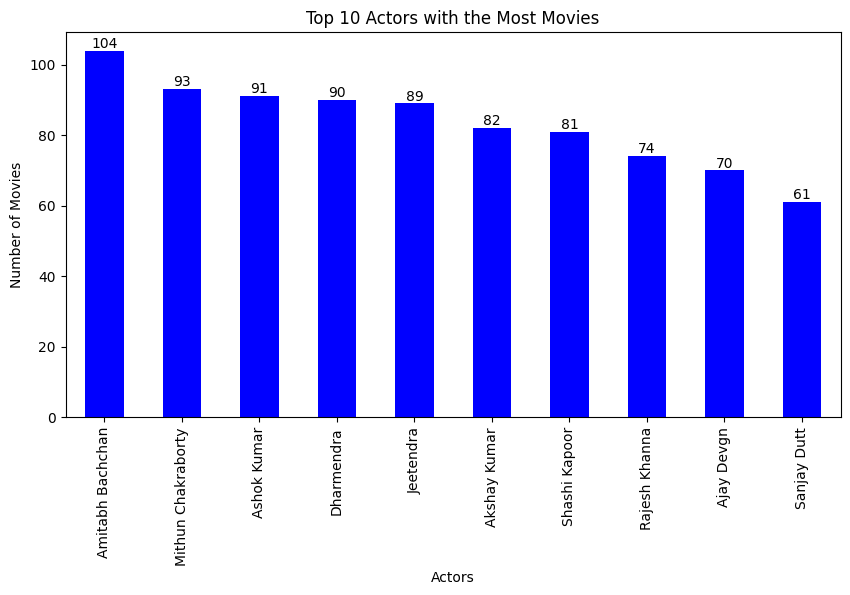

In [27]:
a_movie_count = df['Actor 1'].value_counts()

plt.figure(figsize=(10, 5))
a_movie_count.head(10).plot(kind='bar', color='blue')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors with the Most Movies')

for i, v in enumerate(a_movie_count.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()